# **INF1721: Análise de Algoritmos  - Trabalho 3**

**Data de Entrega:** 18 de Junho 2022 <br>
**Professor:** Marcus Vinicius S. Poggi de Aragão <br>
**Alunos:**
*   Aiko Ramalho de Oliveira - 1820892
*   Isabella de Freitas Lima Aguiar Mariz - 1720511
*   Pedro Antônio Tibau Velozo - 1812013


---


## **1. Problema do Fluxo Máximo**

<t> Considere um grafo orientado $G = (V,E)$ cujos arcos tem capacidade $u_{ij}, \forall (i,j) \in E$. Em seguida, considere dois vértices $s,t \in V$, denominados respectivamente como *source* $s$ (origem) e *sink* $t$ (destino). 

<t> O **Valor de Fluxo em Rede** $f$ em um grafo $G$ eh qualquer atribuição de valores à todos os $m = |E|$ arcos desse grafo:

$$ f = (f_1, f_2, f_3, ..., f_m) $$

<t> Para a análise do problema de fluxo máximo, serão consideradas as seguintes restrições:

1. Deve passar apenas um tipo de informação pelo fluxo $f$.

2. **Restrição de Capacidade -** associado a um arco $(i,j) \in E$, existe um fluxo $f_{ij}$ tal que:
$$0 \leq f_{ij} \leq u_{ij}$$

3. **Conservação de Fluxo -** para que o fluxo $f$ seja viável, deve haver uma conservação de fluxo em *todos* os vértices $v \in V$, ou seja, a soma dos fluxos que entram em $v$ deve ser igual a soma dos fluxos que saem de $v$:
$$\sum_{e \in δ^+(v)} f_e = \sum_{e \in δ^-(v)} f_e$$

<t> O **Problema de Fluxo Máximo** consiste em encontrar um fluxo por onde passa o máximo possivel entre $s$ e $t$, sem exceder a capacidade $u_{ij}$ de nenhum arco.

<t> A Figura à seguir demonstra um exemplo de grafo $G$, um fluxo viável $f$ para ele, e o seu fluxo máximo $f_{max}$:

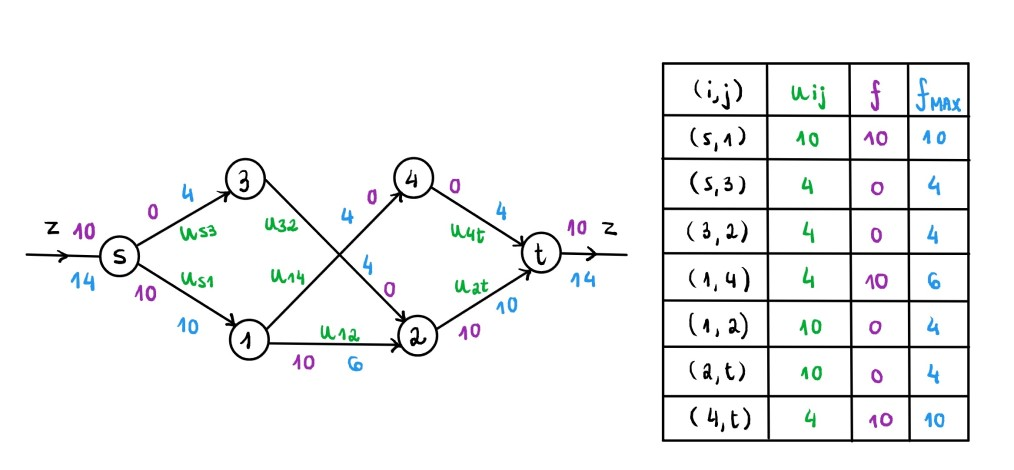

<t> Nota-se que o fluxo $f$ em roxo é um possível fluxo para $G$ que respeita as condições de restrição de capacidade e de conservação de fluxo, para todos os vértices do grafo. Porém, esse fluxo ainda pode ser maximizado sem violar as restrições, obtendo-se assim o fluxo $f_{max}$ em azul, o máximo para $G$.

### **1.1 - Algoritmos de Fluxo Máximo**

<t> Para que se possa resolver o problema do fluxo máximo, serão estudados dois tipos de algoritmos:
    
- **Edmonds-Karp** - algoritmo do tipo caminho aumentante (*augmenting path algorithm*), que mantém um fluxo $f$ e vai incrementando o mesmo ao longo dos caminhos aumentantes, desde o *source* $s$ e até o *sink* $t$.
- **Preflow-Push** (genérico, FIFO e *highest label*) - algoritmo do tipo *preflow-push*, que atribui para cada arco um valor não negativo chamado de *pré-fluxo* e vai incrementando o fluxo arco por arco.
    
<t> É importante notar que estes algoritmos se baseiam em *condições de otimalidade* que garantem sua eficácia e corretude. No caso dos algoritmos de fluxo máximo, têm-se as seguintes conjuturas:

> **Definição I -** Um *corte s-t* é um conjunto $S$ tal que $s \in S$, $t \notin S$, e $S \subset V$.
$$ \delta(S) = \{ (i,j) \in E, i \in S, j \notin S, S \subset V \} $$

(Como $s$ e $t$ tem que estar em conjuntos separados, a quantidade possível de subconjuntos $S$ é $2^{n-2}$.)

> **Definição II -** Um arco $(i,j)$ de um corte $S$ é *direto* se ele vai da margem inferior para a margem superior do corte (e *reverso*, no caso oposto). Assim, a *capacidade de um corte* $S$ é a soma das capacidades de todos os arcos diretos desse corte:
$$ U^+(S) = \Sigma u_{ij}, \forall (i,j) \in \delta^+(S) $$

<t> Dessa maneira, tem-se que:
    
> **Propriedade I -** O valor $z$ de qualquer fluxo $f$ é limitado pela capacidade de qualquer corte $S$ na rede:
$$ \forall S \subset V , z \leq \sum_{e \in \delta^+(S)} u_e = U^+(S) $$

<t> Essa propriedade implica que, se um fluxo $f$ tem valor igual à capacidade de algum corte $S$, então $f$ é um fluxo máximo e $S$ é um corte mínimo, chegando no seguinte teorema:
    
> **Teorema do Fluxo Máximo e Corte Mínimo -** O valor máximo de um fluxo $f$ (maior valor possível para $z$) é limitado pelo corte $S$ de menor capacidade, conhecido como *corte de capacidade mínima*.
    
<t> Esse Teorema é a condição de otimalidade que garante a corretude dos algoritmos de fluxo máximo, que serão discutidos em seguida.

### **1.2 - Algoritmo de Edmonds-Karp**

<t> O algoritmo de Edmonds-Karp é um algoritmo de caminho aumentante (*augmenting path algorithm*), e é preciso fazer algumas definições prévias para entender o seu funcionamento.
    
> **Definição III -** Um caminho $p$ na rede $G=(V,E)$ é um *caminho aumentante* se
> - $p$ vai do vértice de origem *source* $s$ até o vértice de destino *sink* $t$,
> - nenhum arco direto de $p$ está cheio (fluxo no arco é igual à capacidade do arco),
> - nenhum arco reverso de $p$ está vazio (fluxo no arco é nulo).
    
> **Definição IV -** Dada uma rede $G=(V,E)$ e um fluxo $f$, a *capacidade residual* $r_{ij}$ de qualquer arco $(i,j) \in E$ é o fluxo adicional máximo que pode ser enviado do vértice $i$ até o vértice $j$ usando os arcos $(i,j)$ e $(j,i)$.
$$ r_{ij} = u{ij} - f_{ij} + f_{ji} $$
> A rede que contém todos os arcos $e$ de capacidade residual $r_e$ positiva é conhecida como *rede residual* $G(f)$ (com respeito ao fluxo $f$).
    
> **Definição V -** Seja $p$ um caminho aumentante em relação à um fluxo $f$. A *capacidade residual* de $p$, $\delta_p$ é a capacidade residual mínima de qualquer arco $e$ nesse caminho.

<t> Dessa maneira, entende-se que o algoritmo de Edmonds-Karp é uma variação do algoritmo de Ford-Fulkerson, que utiliza caminhos aumentantes para encontrar o fluxo máximo em uma rede $G = (V,E)$. Porém, ele faz uma adaptação que consiste em aplicar a Busca em Largura em cima da rede residual $G(f)$ como critério de escolha dos caminhos aumentados, quando existe mais de um possível.
    
```
    EDMONDS-KARP (G, s, t)
1      z ← 0                                      -- fluxo z inicialmente nulo
2      while p ≠ NIL                              -- enquanto existir um caminho aumentante p
3         p ← BFS(s, t, G(z))                     -- encontrar um caminho aumentante p na rede residual G(z)
4         R ← min {Rij : (i, j) ∈ p}              -- calcular capacidade residual de p
5         for each edge e ∈ p                     -- percorrer os arcos de p
6            e.direct.z ← e.direct.z + R          -- atualiza o fluxo nos arcos (diretos e reversos)
7            e.reverse.z ← e.reverse.z - R
8         z ← z + R                               -- atualiza o fluxo z
```
   
<t> A complexidade de pior caso do algoritmo é dada por $O(|V| \times |E|^2)$ e independe do valor do fluxo máximo.

### **1.3 - Algoritmo Preflow-Push**

<t> Um dos aspectos negativos dos algoritmos de caminho aumentante, como o Edmonds-Karp, é o alto custo computacional da operação de incrementar o fluxo ao longo de um caminho (que custa $O(|V|)$ no pior caso). Por isso, procura-se estudar uma alternativa de algoritmo de fluxo máximo que possua uma melhor perfomance para o pior caso.
    
<t> O algoritmo *Preflow-Push* (ou *Push-Relabel*) vai incremementando o valor do fluxo *arco por arco* ao invés de ao longo de caminhos aumentantes, se tornando mais eficiente asintóticamente do que o algoritmo de Edmonds-Karp. 
    
<t> Porém, essa característica faz com que o algoritmo não satisfaça a restrição de **Conservação de Fluxo** (definida anteriormente na Seção 1.1), e por isso ele trabalha com o conceito de "pré-fluxo", ao invés de um fluxo propriamente dito:
    
> **Definição VI -** Um *pré-fluxo* $f'$ é uma função $f' : E \rightarrow \mathbb{R}$ que satisfaz a condição original de **Restrição de Capacidade** e uma versão "relaxada" da condição de **Conservação de Fluxo**:
$$\forall v \in V - \{s,t\}, \, x(v) = \sum_{e \in δ^+(v)} f_e - \sum_{e \in δ^-(v)} f_e \geq 0$$
> onde $x(v)$ é o *excesso* do vértice $v$.
    
<t> (Nota-se que um pré-fluxo onde $x(v) = 0 \,\, \forall v \neq s,t$ é um fluxo de valor $x(t) = -x(s)$, e que o conceito de *rede residual* para pré-fluxos possui a mesma definição feita para fluxos.)
    
<t> Dessa forma, o algoritmo *Preflow-Push* mantém um pré-fluxo $f'$ a cada iteração e vai gradualmente transformando-o em um fluxo, até que seja encontrado o fluxo máximo. 
    
<t> Vértices que possuem um excesso $x(v)$ estritamente positivo são chamados de *vértices ativos*, e a operação básica do algoritmo é selecionar um vértice ativo $v$ e tentar remover seu excesso através do redirecionamento de fluxo para os seus vértices vizinhos.
    
<t> Como o objetivo é fazer com que o fluxo chegue no vértice destino *sink* $t$, o vizinho $w$ de $v$ escolhido para receber o fluxo deve ser aquele mais próximo de $t$. Essa análise de proximidade e escolha de $w$ é calculada por uma *labeling function* $l : V \rightarrow \mathbb{N}$, que usa *distance labels* $d(v)$ nos vértices para determinar quais arcos de $v$ devem ser selecionados.
    
> **Propriedade II -** Considere $G(f') = (V,E_f')$ a rede residual de $G = (V,E)$ em respeito ao pré-fluxo $f'$. A *labeling function* $l$ e o pré-fluxo $f'$ são compatíveis quando:
>
> - $l(s) = |V|$
> - $l(t) = 0$
> - $\forall (i,j) \in E_f', \,\, l(i) \leq l(j) + 1$ 
    
<t> Logo, um arco $(i,j) \in E_f'$ é considerado *admissível* se $l(i) = l(j) + 1$ e, assim, o redirecionamento de fluxo de um vértice $v$ para seus vizinhos deve ser feito apenas em seus arcos admissíveis. 
    
<t> Se $v$ for um vértice ativo, mas não possui arcos adminissíveis, a *distance label* de $v$ é incremementada para criar pelo menos um arco admissível.
    
<t> Por fim, o algoritmo *Preflow-Push* finaliza, tendo encontrado o fluxo máximo da rede $G$, quando a rede não possui mais vértices ativos.

#### **1.3.1 - Preflow-Push Genérico**   

<t> O algoritmo Preflow-Push Genérico utiliza duas sub-rotinas em sua execução, a *preprocess* e *push/relabel*. Segue um pseudocódigo para essas subrotinas a seguir:


```
procedure preprocess;
begin
    z ← 0
    compute the exact distance labels d(i);
    f_sj ← u_sj for each arc (s, j) ∈ δ+(s);
    d(s) ← n;
end;
```

```
procedure pushlrelabel(i);
begin
    if the network contains an admissible arc (i, j) then
        push Δ ← min{v(i), Rij} units of flow from node i to node j
    else replace d(i) by min{d(j) + 1 : (i, j) ∈ δ+(i) and Rij > O};
end;
```

<t> Esses procedimentos são integrados gerando a seguinte rotina para o algoritmo:

```
algorithm preflow-push;
    begin
    preprocess;
    while the network contains an active node do
    begin
        select an active node i;
        push/relabel(i);
    end;
end; 
```

<t> A complexidade total do algorimto é $O(V^2 \times E)$.

#### **1.3.2 - FIFO Selection Rule**

<t> A variação FIFO do algoritmo PreFlow Push faz a seleção dos nós ativos na ordem FIFO (*First In First Out*). O algoritmo mantém um conjunto $Q$ como uma fila,
selecionando o primeiro nó $i$, executando a operação de *push* a partir desse nó e adicionando novos nós ativos no final da fila $Q$.

<t> O algoritmo itera sobre o nó $i$ até ele se tornar inativo, ou ter sua distance label alterada (*relabel*). Nesse último caso o nó $i$ volta para o final de fila.
A execução finaliza quando a fila de nós ativos $Q$ estiver vazia.

<t> A complexidade total do algorimto é $O(V^3)$.

#### **1.3.3 - Highest Label Selection Rule**

<t> A variação *Highest Label* do algoritmo PreFlow Push faz a seleção dos nó ativo priorizando aquele com o maior *distance label*.

<t> Seja $d^* = d(i)$ a *distance label* de um nó ativo $i$, que é a maior dentre todos os nós ativos. O
algoritmo primeiro examina os nós com *distance labels* iguais a $d^*$ e faz o *push* do fluxo para os nós de *distance label* iguais à $d^* - 1$; esses nós, por sua vez, fazem o *push* do fluxo para aqueles de *distance label* igual a $d^* - 2$ e assim por diante, até que um nó seja *relabeled* ou todos nós ativos já tenham sido percorridos. Quando um nó é *relabeled* o algoritmo repete o mesmo processo anterior.

<t> A complexidade total do algorimto é $O(V^2 \times \sqrt{E})$.

# **2. Implementação**

<t> A seguir, tem-se a função de leitura dos arquivos de entrada, seguido das implementações dos quatro algoritmos descritos anteriormente.

In [1]:
import time
import matplotlib.pyplot as plt

In [27]:
# Read file and initialize data structures for graph
def graph_read(file_name):
    global n, m, v_min, v_max, arc_i, arc_j, cap_u, listAdjP, listAdjN, s, t

    f = open(file_name, 'r+')

    arc_i = {}
    arc_j = {}
    cap_u = {}

    infty_cost = 1.0
    v_min = 100000000
    v_max = 0
    a = 0
    row = 0
    for line in f.readlines():
        item_data = line.split()
        if (row >= 4):
            r = row
            a += 1
            i = int(item_data[0])
            arc_i[a] = i
            j = int(item_data[1])
            arc_j[a] = j
            x = float(item_data[2])
            xx = int(x * 10000)

            cap_u[a] = xx

            # print a, i,j, item_data[2], x, xx, cap_u[a]

            if v_min > min(i, j):
                v_min = min(i, j)
            if v_max < max(i, j):
                v_max = max(i, j)
            # print r, i, j, x
        else:
            if row == 0:
                n = int(item_data[0])
            if row == 1:
                m = int(item_data[0])
            if row == 2:
                s = int(item_data[0])
            if row == 3:
                t = int(item_data[0])
        row += 1
    f.close()

    print(" n m s t row v_min v_max ", n, m, s, t, row, v_min, v_max)

    # Cria Listas de Adjacencia Positiva e Negativa
    listAdjP = {}
    listAdjN = {}
    for i in range(v_min, v_max+1):
        listAdjP[i] = []
        listAdjN[i] = []

    for l in range(1, m+1):
        listAdjP[arc_i[l]].append(arc_j[l])
        listAdjN[arc_j[l]].append(arc_i[l])


### **2.1 - Algoritmo de Edmonds-Karp**

In [3]:
# Find path from s to t in the residual network - Or show there's none.

# Busca em Largura - BFS -

def bfs_resNet():
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN
    global ij2arc, s, t, cap_u, pred, f

    pred = {}
    d_visit = {}
    for i in range(v_min, v_max+1):
        d_visit[i] = -1
        pred[i] = -1

    q = []
    q.append(s)
    d_visit[s] = 0
    pred[s] = v_max+1

    cont1 = 0

    while len(q) > 0:
        # print q

        v = q[0]
        q.remove(q[0])

        for w in listAdjP[v]:
            cont1 += 1
            # print cont1," | (", v,w,")"
            a = ij2arc[v, w]
            if d_visit[w] == -1 and (cap_u[a] - f[a]) > 0:
                d_visit[w] = d_visit[v] + 1
                pred[w] = v
                if w == t:
                    return True
                q.append(w)
                #print("       v:", w," dist: ", d_visit[w])

        for w in listAdjN[v]:
            cont1 += 1
            # print cont1," | (", w,v,") inv "
            a = ij2arc[w, v]
            if d_visit[w] == -1 and f[a] > 0:
                d_visit[w] = d_visit[v] + 1
                pred[w] = -v
                if w == t:
                    return True
                q.append(w)
                #print("       v:", w," dist: ", d_visit[w])

    return False


In [4]:
# Edmonds Karp Alg for Max-Flow

def EK_MaxFlow():
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN
    global ij2arc, s, t, cap_u, pred, f, print_iters

    k = 0
    # gener_graph_flow()

    # print(" s, t ", s, t)
    # Flow Var
    f = {}
    path = {}

    max_cap = 0
    for a in range(1, m+1):
        f[a] = 0
        if max_cap < cap_u[a]:
            max_cap = cap_u[a]

    ij2arc = {}
    for a in range(1, m+1):
        ij2arc[arc_i[a], arc_j[a]] = a

    total_flow = 0
    itera = 0
    while bfs_resNet():
        # Get path and compute delta
        itera += 1
        # print  " iter pred ", itera, pred
        k = 0
        v_curr = t
        delta = max_cap
        while pred[v_curr] != v_max + 1:
            v_next = pred[v_curr]
            if v_next > 0:
                a = ij2arc[v_next, v_curr]
                path[k] = a
                if delta > cap_u[a] - f[a]:
                    delta = cap_u[a] - f[a]
            else:
                v_next = -v_next
                a = ij2arc[v_curr, v_next]
                path[k] = -a
                if delta > f[a]:
                    delta = f[a]

            v_curr = v_next
            k += 1

        total_flow += delta
        if print_iters:
            print(" Iteration: ", itera, " Delta:", delta, k, total_flow)
        # Update Flow
        for qq in range(k):
            a = path[qq]
            if a > 0:
                # print(" ", arc_i[a], "->", arc_j[a], " ")
                f[a] += delta
            else:
                # print(" ", arc_j[-a], "->", arc_i[-a], " ")
                f[-a] -= delta

    # print(" Total Flow: ", total_flow, " Number of Iterations: ",
    #       itera, " Lenght of last augmenting path: ", k)


### **2.2 - Algoritmo Preflow-Push**

In [5]:
def PR_bfs_init():
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN
    global ij2arc, s, t, cap_u, pred, f, print_iters, d_visit

    d_visit = {}
    for i in range(v_min, v_max+1):
        d_visit[i] = -1

    q = []
    q.append(t)
    d_visit[t] = 0

    cont1 = 0

    while len(q) > 0:
        # print q

        v = q[0]
        q.remove(q[0])

        for w in listAdjN[v]:
            cont1 += 1
            # print cont1," | (", w,v,") inv "
            if d_visit[w] == -1:
                d_visit[w] = d_visit[v] + 1
                q.append(w)


def PR_push_relabel(v):
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN, PR_total_flow, itera
    global ij2arc, s, t, cap_u, pred, f, print_iters, d_visit, excess, excess_list

    # Find Admissible Arc

    min_d = 2*n+1

    for w in listAdjP[v]:
        a = ij2arc[v, w]
        res_cap_a = cap_u[a] - f[a]

        if res_cap_a > 0:
            if d_visit[v] == d_visit[w]+1:
                # (v,w) is admissible
                # Push min excess(i) and res_cap_a
                if excess[v] < res_cap_a:
                    delta = excess[v]
                else:
                    delta = res_cap_a

                f[a] += delta
                excess[v] -= delta
                if excess[v] == 0 and v != s and v != t:
                    excess_list.remove(v)

                if excess[w] == 0 and w != s and w != t:
                    excess_list.insert(0, w)

                excess[w] += delta

                if w == t:
                    PR_total_flow += delta
                    # print "In PR_Push_Relabel Flow - Itera  ", PR_total_flow, itera
                return True

            # Keeps the minimum height of v neighbors in the residual network
            if min_d > d_visit[w]:
                min_d = d_visit[w]

    for w in listAdjN[v]:
        a = ij2arc[w, v]
        res_cap_a = f[a]

        if res_cap_a > 0:
            if d_visit[v] == d_visit[w]+1:
                # (w,v) is admissible - (v,w) reverse
                # Push min excess(i) and res_cap_a

                if excess[v] < res_cap_a:
                    delta = excess[v]
                else:
                    delta = res_cap_a

                f[a] -= delta
                excess[v] -= delta

                if excess[v] == 0 and v != s and v != t:
                    excess_list.remove(v)

                if excess[w] == 0 and w != s and w != t:
                    excess_list.insert(0, w)

                excess[w] += delta
                return True

            # Keeps the minimum height of v neighbors in the residual network
            if min_d > d_visit[w]:
                min_d = d_visit[w]

    # Relabel

    d_visit[v] = min_d + 1

    return False


def PR_MaxFlow():
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN, PR_total_flow, itera
    global ij2arc, s, t, cap_u, pred, f, print_iters, d_visit, excess, excess_list

    # print(" s, t ", s, t)
    # Flow Var
    f = {}
    PR_total_flow = 0

    # Pre-Process

    max_cap = 0
    for a in range(1, m+1):
        f[a] = 0
        if max_cap < cap_u[a]:
            max_cap = cap_u[a]

    ij2arc = {}
    for a in range(1, m+1):
        ij2arc[arc_i[a], arc_j[a]] = a

    # Compute Distances in edges from terminal to all other vertices

    PR_bfs_init()
    d_visit[s] = n

    # Init vertices excess

    excess = {}
    for v in range(v_min, v_max+1):
        excess[v] = 0

    # Start flow of arcs leaving s with their maximum capacity
    # Update excess

    excess_list = []

    excess[s] = 0
    for w in listAdjP[s]:
        a = ij2arc[s, w]
        f[a] = cap_u[a]
        excess[w] = cap_u[a]
        excess[s] -= cap_u[a]
        excess_list.insert(0, w)

    # while there are vertices with excess (except t), i.e.: Active Nodes

    itera = 0
    while len(excess_list) > 0:
        itera += 1
        # print("\n iter: ", itera)
        # print(" List: ", excess_list)
        # print(" Dist ", d_visit)
        # print(" Excess ", excess)
        # print(" Flow ", f)
        # print(" cap  ", cap_u)

        #pp = input()

        v = excess_list[0]
        PR_push_relabel(v)

    # print("\n iter: ", itera)
    # print(" List: ", excess_list)
    # print(" Dist ", d_visit)
    # print(" Excess ", excess)
    # print(" Flow ", f)
    # print(" cap  ", cap_u)

    # print " Total Flow: ", total_flow," Number of Iterations: ", itera
    # print("In PR_MaxFlow  -  Total Flow:",
    #       PR_total_flow, " Total Iterations:", itera)


### **2.3 - FIFO Selection Rule**

In [6]:
def PR_push_relabel_FIFO(v):
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN, PR_total_flow, itera 
    global ij2arc, s, t, cap_u, pred, f, print_iters, d_visit, excess, excess_list

    ## Find Admissible Arc
    
    min_d = 2*n+1
    
    repeat = True
    while repeat and excess[v]>0:

        push = False
        for w in listAdjP[v]:
            if not push:
                a = ij2arc[v,w]
                res_cap_a = cap_u[a] - f[a]

                if res_cap_a > 0:
                    if d_visit[v] == d_visit[w]+1:
                        # (v,w) is admissible
                        ## Push min excess(i) and res_cap_a
                        if excess[v] < res_cap_a:
                            delta = excess[v]                        
                        else:
                            delta = res_cap_a

                        f[a] += delta
                        push = True
                        excess[v] -=  delta

                        if excess[v] == 0 and v != s and v != t:
                            # direct arc
                            excess_list.remove(v)
                            repeat = False

                        if excess[w] == 0 and w != s and w != t:
                            excess_list.insert(len(excess_list),w)

                        excess[w] += delta

                        if w == t:
                            PR_total_flow += delta
                            #print "In PR_Push_Relabel Flow - Itera  ", PR_total_flow, itera

                    # Keeps the minimum height of v neighbors in the residual network
                    if min_d > d_visit[w]:
                        min_d = d_visit[w]


        if not push:
            for w in listAdjN[v]:
                if not push:
                    a = ij2arc[w,v]
                    res_cap_a = f[a]

                    if res_cap_a > 0:        
                        if d_visit[v] == d_visit[w]+1:
                            # (w,v) is admissible - (v,w) reverse
                            ## Push min excess(i) and res_cap_a

                            if excess[v] < res_cap_a:
                                delta = excess[v]
                            else:
                                delta = res_cap_a

                            push = True
                            f[a] -= delta
                            excess[v] -=  delta

                            if excess[v] == 0 and v != s and v != t:
                                # reverse arc
                                excess_list.remove(v)
                                repeat = False

                            if excess[w] == 0 and w != s and w != t:
                                excess_list.insert(len(excess_list),w)

                            excess[w] += delta

                        # Keeps the minimum height of v neighbors in the residual network
                        if min_d > d_visit[w]:
                            min_d = d_visit[w]

        ## Relabel
        if not push:
            d_visit[v] = min_d + 1
            excess_list.remove(v)
            excess_list.insert(len(excess_list),v)
            repeat = False

def PR_MaxFlow_FIFO():
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN, PR_total_flow, itera  
    global ij2arc, s, t, cap_u, pred, f, print_iters, d_visit, excess, excess_list, Print_Set
    
    
    if Print_Set > 0:
        print(" s, t ", s, t)
    ## Flow Var
    f = {}
    PR_total_flow = 0
    
    ## Pre-Process

    max_cap = 0
    for a in range(1, m+1):
        f[a] = 0
        if max_cap < cap_u[a]:
            max_cap = cap_u[a]

    ij2arc = {}
    for a in range(1, m+1):
        ij2arc[arc_i[a], arc_j[a]] = a
        
    ## Compute Distances in edges from terminal to all other vertices
    
    PR_bfs_init()
    d_visit[s] = n

    ## Init vertices excess
    
    excess = {}
    for v in range(v_min, v_max+1):
        excess[v] = 0

    ## Start flow of arcs leaving s with their maximum capacity
    ## Update excess
    
    excess_list = []
    
    excess[s] = 0
    for w in listAdjP[s]:
        a = ij2arc[s, w]
        f[a] = cap_u[a]
        excess[w] = cap_u[a]
        excess[s] -= cap_u[a]
        excess_list.insert(0, w)
        
    
    ## while there are vertices with excess (except t), i.e.: Active Nodes
    
    itera = 0
    while len(excess_list) > 0:
        itera += 1
        if Print_Set > 2:
            print("\n iter: ", itera)
            print(" List: ", excess_list)
            print(" Dist ", d_visit)
            print(" Excess ", excess)
            print(" Flow ", f)
            print(" cap  ", cap_u)
        
        #pp = input()

        v = excess_list[0]
        PR_push_relabel_FIFO(v)

    if Print_Set > 1:
        print("\n iter: ", itera)
        print(" List: ", excess_list)
        print(" Dist ", d_visit)
        print(" Excess ", excess)
        print(" Flow ", f)
        print(" cap  ", cap_u)

    print("In PR_MaxFlow FIFO -  Total Flow:", PR_total_flow," Total Iterations:", itera)



### **2.4 - Highest Label Selection Rule**

In [7]:
def PR_push_relabel_HL(v):
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN, PR_total_flow, itera
    global ij2arc, s, t, cap_u, pred, f, print_iters, d_visit, excess, excess_list, hl_excess_list, highest_label

    # Find Admissible Arc

    min_d = 2*n+1

    repeat = True

    while repeat and excess[v] > 0:
        # print('v: ', v)
        # print(f'd_visit[{v}]: ', d_visit[v])
        # print('hl_excess_list: ', hl_excess_list)

        push = False
        for w in listAdjP[v]:
            if not push:
                a = ij2arc[v, w]
                res_cap_a = cap_u[a] - f[a]

                if res_cap_a > 0:
                    if d_visit[v] == d_visit[w]+1:
                        # (v,w) is admissible
                        # Push min excess(i) and res_cap_a
                        if excess[v] < res_cap_a:
                            delta = excess[v]
                        else:
                            delta = res_cap_a

                        f[a] += delta
                        push = True
                        excess[v] -= delta

                        if excess[v] == 0 and v != s and v != t:
                            # direct arc
                            hl_excess_list[d_visit[v]].remove(v)

                            for label in reversed(hl_excess_list):
                                # 1a lista nao vazia
                                if hl_excess_list[label]:
                                    # print(
                                    #     'hl_excess_list[label]: ', hl_excess_list[label])
                                    highest_label = label
                                    break

                            repeat = False

                        if excess[w] == 0 and w != s and w != t:
                            hl_excess_list[d_visit[w]].insert(
                                len(hl_excess_list), w)

                        excess[w] += delta

                        if w == t:
                            PR_total_flow += delta
                            # print "In PR_Push_Relabel Flow - Itera  ", PR_total_flow, itera

                    # Keeps the minimum height of v neighbors in the residual network
                    if min_d > d_visit[w]:
                        min_d = d_visit[w]

        if not push:
            for w in listAdjN[v]:
                if not push:
                    a = ij2arc[w, v]
                    res_cap_a = f[a]

                    if res_cap_a > 0:
                        if d_visit[v] == d_visit[w]+1:
                            # (w,v) is admissible - (v,w) reverse
                            # Push min excess(i) and res_cap_a

                            if excess[v] < res_cap_a:
                                delta = excess[v]
                            else:
                                delta = res_cap_a

                            push = True
                            f[a] -= delta
                            excess[v] -= delta

                            if excess[v] == 0 and v != s and v != t:
                                # reverse arc
                                hl_excess_list[d_visit[v]].remove(v)

                                for label in reversed(hl_excess_list):
                                    # 1a lista nao vazia
                                    if hl_excess_list[label]:
                                        highest_label = label
                                        break

                                repeat = False

                            if excess[w] == 0 and w != s and w != t:
                                hl_excess_list[d_visit[w]].insert(
                                    len(hl_excess_list), w)

                            excess[w] += delta

                        # Keeps the minimum height of v neighbors in the residual network
                        if min_d > d_visit[w]:
                            min_d = d_visit[w]

        # Relabel
        if not push:
            hl_excess_list[d_visit[v]].remove(v)
            d_visit[v] = min_d + 1
            hl_excess_list[d_visit[v]].insert(
                len(hl_excess_list[d_visit[v]]), v)

            if highest_label < d_visit[v]:
                highest_label = d_visit[v]
            repeat = False


def PR_MaxFlow_HL():
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN, PR_total_flow, itera
    global ij2arc, s, t, cap_u, pred, f, print_iters, d_visit, excess, excess_list, hl_excess_list, Print_Set, highest_label

    if Print_Set > 0:
        print(" s, t ", s, t)
    # Flow Var
    f = {}
    PR_total_flow = 0

    # Pre-Process

    max_cap = 0
    for a in range(1, m+1):
        f[a] = 0
        if max_cap < cap_u[a]:
            max_cap = cap_u[a]

    ij2arc = {}
    for a in range(1, m+1):
        ij2arc[arc_i[a], arc_j[a]] = a

    # Compute Distances in edges from terminal to all other vertices

    PR_bfs_init()
    d_visit[s] = n

    # Init vertices excess

    excess = {}
    for v in range(v_min, v_max+1):
        excess[v] = 0

    # Start flow of arcs leaving s with their maximum capacity
    # Update excess

    hl_excess_list = {}
    for i in range(0, 2*n + 1):
        hl_excess_list[i] = []

    highest_label = 0
    excess[s] = 0
    for w in listAdjP[s]:
        a = ij2arc[s, w]
        f[a] = cap_u[a]
        excess[w] = cap_u[a]
        excess[s] -= cap_u[a]
        hl_excess_list[d_visit[w]].insert(0, w)
        if highest_label < d_visit[w]:
            highest_label = d_visit[w]

    # while there are vertices with excess (except t), i.e.: Active Nodes

    itera = 0
    excess_true = True
    while len(hl_excess_list) > 0:  # len(excess_list) > 0:
        itera += 1
        if Print_Set > 2:
            print("\n iter: ", itera)
            print(" List: ", excess_list)
            print(" Dist ", d_visit)
            print(" Excess ", excess)
            print(" Flow ", f)
            print(" cap  ", cap_u)

        #pp = input()

        for label in reversed(hl_excess_list):
            # 1a lista nao vazia
            if hl_excess_list[label]:
                highest_label = label
                break

        PR_push_relabel_HL(v)

    if Print_Set > 1:
        print("\n iter: ", itera)
        print(" List: ", excess_list)
        print(" Dist ", d_visit)
        print(" Excess ", excess)
        print(" Flow ", f)
        print(" cap  ", cap_u)

    if Print_Set > 2:
        for i in range(0, 2*n + 1):
            print(" Label: ", i, len(hl_excess_list[i]), hl_excess_list[i])

    print("In PR_MaxFlow FIFO -  Total Flow:",
          PR_total_flow, " Total Iterations:", itera)


<t> **Observação:** A implementação para o *Highest Label* não está funcionando, faltou finalizar as correções.

In [8]:
# TENTANDO RODAR O HL (não está funcionando)

# file = f"maxflow-instances-zuse88/elist{96}d.rmf"
# graph_read(file)

# Print_Set = 0
# PR_MaxFlow_HL()

# 3. Análise Experimental

In [9]:
def getEFromFile(nv):
    file = f"maxflow-instances-zuse88/elist{nv}d.rmf"
    f = open(file, 'r+')
    ret = int(f.readlines()[1].split()[0])
    f.close()
    return ret


In [10]:
numero_de_vertices = [96, 160, 200, 500, 640, 960, 1440]
numero_de_arestas = [getEFromFile(nv) for nv in numero_de_vertices]


In [11]:
complexidade_teorica_EK = [v * (e**2)  for v, e in zip(numero_de_vertices, numero_de_arestas)] # complexidade teorica é O(VE^2)
complexidade_teorica_PFP = [(v ** 2) * e for v, e in zip(numero_de_vertices, numero_de_arestas)] #complexidade é O((V^2)*E)
complexidade_teorica_FIFOSR = [v**3 for v, _ in zip(numero_de_vertices, numero_de_arestas)] #complexidade é O(V^3)
complexidade_teorica_HLSR = [(v**2)*(e**1/2) for v, e in zip(numero_de_vertices, numero_de_arestas)] # complexidade teorica é O(V^2 * sqrt(E))

In [12]:
tempos_cpu_edmond_karp = []
tempos_cpu_preflow_push = []
tempos_cpu_preflow_push_FIFO = []
tempos_cpu_preflow_push_HL = []

for num_vertices in numero_de_vertices:
    file = f"maxflow-instances-zuse88/elist{num_vertices}d.rmf"
    graph_read(file)

    time_start = time.time()
    print_iters = False
    EK_MaxFlow()
    time_end = time.time()
    tempos_cpu_edmond_karp.append(time_end - time_start)

    time_start = time.time()
    print_iters = False
    PR_MaxFlow()
    time_end = time.time()
    tempos_cpu_preflow_push.append(time_end - time_start)

    time_start = time.time()
    Print_Set = 0
    PR_MaxFlow_FIFO()
    time_end = time.time()
    tempos_cpu_preflow_push_FIFO.append(time_end - time_start)

    # # ALGORITMO INCOMPLETO
    # time_start = time.time()
    # Print_Set = 0
    # PR_MaxFlow_HL()
    # time_end = time.time()
    # tempos_cpu_preflow_push_HL.append(time_end - time_start)


 n m s t row v_min v_max  96 528 1 96 532 1 96
In PR_MaxFlow FIFO -  Total Flow: 13783  Total Iterations: 12854
 n m s t row v_min v_max  160 912 1 160 916 1 160
In PR_MaxFlow FIFO -  Total Flow: 2118489  Total Iterations: 10148
 n m s t row v_min v_max  200 1340 1 200 1344 1 200
In PR_MaxFlow FIFO -  Total Flow: 21352  Total Iterations: 25788
 n m s t row v_min v_max  500 3975 1 500 3979 1 500
In PR_MaxFlow FIFO -  Total Flow: 7021105  Total Iterations: 37374
 n m s t row v_min v_max  640 12608 1 640 12612 1 640
In PR_MaxFlow FIFO -  Total Flow: 8731  Total Iterations: 318014
 n m s t row v_min v_max  960 9488 1 960 9492 1 960
In PR_MaxFlow FIFO -  Total Flow: 3351555  Total Iterations: 1484608
 n m s t row v_min v_max  1440 22128 1 1440 22132 1 1440
In PR_MaxFlow FIFO -  Total Flow: 3510126  Total Iterations: 3518060


### Gráficos Comparativos Para Cada Algoritmo: Teórica x Experimental

<t> Essa seção visa plotar os gráficos comparativos entre a complexidade teórica e experimental para cada algoritmo individualmente.

In [33]:
# ultimo ponto (x,y) a ser plotado para cada vetor
v1_ek = tempos_cpu_edmond_karp[-1]
v2_ek = complexidade_teorica_EK[-1]

# criamos uma constante para melhorar a escala do grafico
valor_para_escalar_o_plot_ek = v2_ek/v1_ek

v1_pfp = tempos_cpu_preflow_push[-1]
v2_pfp = complexidade_teorica_PFP[-1]

# criamos uma constante para melhorar a escala do grafico
valor_para_escalar_o_plot_pfp = v2_pfp/v1_pfp

v1_fifo = tempos_cpu_preflow_push_FIFO[-1]
v2_fifo = complexidade_teorica_FIFOSR[-1]

# criamos uma constante para melhorar a escala do grafico
valor_para_escalar_o_plot_fifo = v2_fifo/v1_fifo

# aplicando a constante de escala no vetor das complexidades
y_teorico_ek = [
    1.5*(el/valor_para_escalar_o_plot_ek) for el in complexidade_teorica_EK]

y_teorico_pfp = [
    1.5*(elx/valor_para_escalar_o_plot_pfp) for elx in complexidade_teorica_PFP]

y_teorico_fifo = [
    1.5*(ely/valor_para_escalar_o_plot_fifo) for ely in complexidade_teorica_FIFOSR]


#### Edmonds-Karp

<t> A implementação à seguir mostra a comparação da complexidade teórica de pior caso do algoritmo de Edmonds-Karp com o tempo de execução calculado experimentalmente.
    
<t> Nota-se que, conforme o tamanho da entrada vai aumentando, a distância entre os dois gráficos vai aumentando, o que sugere uma boa perfomance para a implementação prática do algoritmo. Para o caso de 1400 vértices, por exemplo, a diferença de tempo foi de quase 100 segundos. Além disso, o gráfico experimental encontra-se abaixo do gráfico teórico, mesmo com o fator de escala, o que é de se esperar, já que o gráfico teórico representa o limite superior da complexidade para o algoritmo.

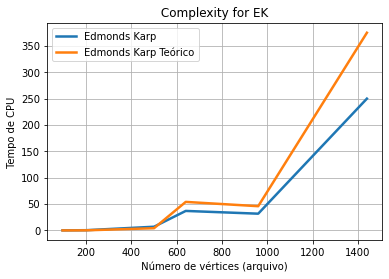

In [34]:
plt.plot(numero_de_vertices, tempos_cpu_edmond_karp, label='Edmonds Karp', linewidth=2.5)
plt.plot(numero_de_vertices, y_teorico_ek, label='Edmonds Karp Teórico', linewidth=2.5)

plt.title(" Complexity for EK ")
plt.ylabel(" Tempo de CPU ")
plt.xlabel(" Número de vértices (arquivo) ")

plt.grid()
plt.legend()
plt.show()


#### Pre-Flow Push

<t> A implementação à seguir mostra a comparação da complexidade teórica de pior caso do algoritmo de Pre-Flow Push (genérico e FIFO) com o tempo de execução calculado experimentalmente.
    
<t> Igual ao que ocorreu com o Edmonds-Karp, conforme o tamanho da entrada vai aumentando, a distância entre os gráficos teóricos e experimentais vai aumentando, para ambas as versões do algoritmo. Porém, para valores de entrada maiores, a diferença entre o teórico e experimental foi levemente maior para o FIFO. Na marca de 1400 vértices, por exemplo, a diferença de tempo foi de aproximadamente 40 segundos para o genérico e 60 segundos para o FIFO.
    
<t> Além disso, como também visto no Edmonds-Karp, o gráfico experimental encontra-se abaixo do gráfico teórico, para ambas as implementações do algoritmo.

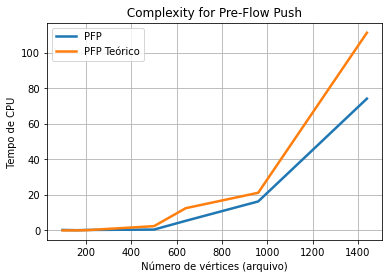

In [37]:
plt.plot(numero_de_vertices, tempos_cpu_preflow_push, label='PFP', linewidth=2.5)
plt.plot(numero_de_vertices, y_teorico_pfp, label='PFP Teórico', linewidth=2.5)

plt.title(" Complexity for Pre-Flow Push ")
plt.ylabel(" Tempo de CPU ")
plt.xlabel(" Número de vértices (arquivo) ")

plt.grid()
plt.legend()
plt.show()

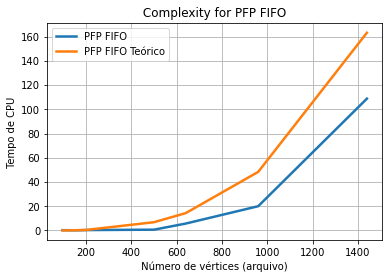

In [38]:
plt.plot(numero_de_vertices, tempos_cpu_preflow_push_FIFO, label='PFP FIFO', linewidth=2.5)
plt.plot(numero_de_vertices, y_teorico_fifo, label='PFP FIFO Teórico', linewidth=2.5)

plt.title(" Complexity for PFP FIFO ")
plt.ylabel(" Tempo de CPU ")
plt.xlabel(" Número de vértices (arquivo) ")

plt.grid()
plt.legend()
plt.show()

### Gráficos Comparativos Entre Algoritmos: Teórica x Experimental

<t> Essa seção visa plotar os gráficos comparativos entre os algoritmos: um gráfico comparando os tempos de execução (com exceção do *Highest Label*) e outro as complexidades teóricas.

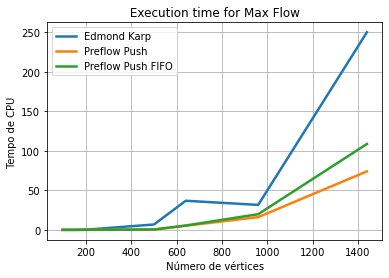

In [13]:
plt.plot(numero_de_vertices, tempos_cpu_edmond_karp, label='Edmond Karp', linewidth=2.5)
plt.plot(numero_de_vertices, tempos_cpu_preflow_push, label='Preflow Push', linewidth=2.5)
plt.plot(numero_de_vertices, tempos_cpu_preflow_push_FIFO, label='Preflow Push FIFO', linewidth=2.5)
# plt.plot(numero_de_vertices, tempos_cpu_preflow_push_HL, label='Preflow Push Highest Label', linewidth=2.5)

plt.title(" Execution time for Max Flow ")
plt.ylabel(" Tempo de CPU ")
plt.xlabel(" Número de vértices ")

plt.grid()
plt.legend()
plt.show()

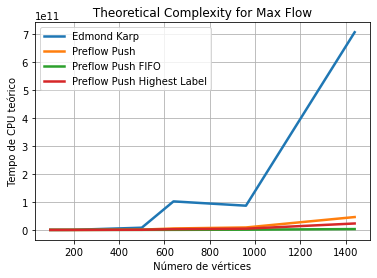

In [14]:
plt.plot(numero_de_vertices, complexidade_teorica_EK, label='Edmond Karp', linewidth=2.5)
plt.plot(numero_de_vertices, complexidade_teorica_PFP, label='Preflow Push', linewidth=2.5)
plt.plot(numero_de_vertices, complexidade_teorica_FIFOSR, label='Preflow Push FIFO', linewidth=2.5)
plt.plot(numero_de_vertices, complexidade_teorica_HLSR, label='Preflow Push Highest Label', linewidth=2.5)

plt.title(" Theoretical Complexity for Max Flow ")
plt.ylabel(" Tempo de CPU teórico ")
plt.xlabel(" Número de vértices ")

plt.grid()
plt.legend()
plt.show()

<t> Primeiramente, no segundo gráfico acima, nota-se que o algoritmo de Edmonds-Karp apresenta uma complexidade teórica pior do que o algoritmo de Pre-Flow Push para calcular o Fluxo Máximo, especialmente para valores de entrada maiores. Este cenário é igualmente refletido nos resultados experimentais dos algoritmos no primeiro gráfico acima, onde o algoritmo de Edmonds-Karp se distancia do Pre-Flow Push FIFO por quase 150 segundos de tempo de CPU à mais para a entrada de 1440 vértices.
    
<t> Além disso, o gráfico das complexidades teóricas também mostra que dentre as implementações do Pre-Flow Push, as melhores performances são, de pior para melhor: a forma genérica, a adaptação FIFO e a adaptação *Highest Label*. Porém, olhando para o gráfico de comparação experimental, nota-se que o Pre-Flow Push genérico obteu uma perfomance levemente melhor do que a implementação por FIFO. Uma possível justificativa para esse ocorrido é o fato que não se há garantia que a complexidade temporal experimental dos algoritmos fosse exibir o mesmo comportamento esperado pela teoria - como pode-se observar na análise anterior feita entre as duas para cada algoritmo individualmente.

# 4. Avaliação

<t> A nota atribuída pelos integrantes desse grupo para esse trabalho é 9,5 / 10. <br>

<t> A justificativa é baseada no fato que as demandas do enunciado foram, na sua maior parte, supridas e a análise feita para os algoritmos de Fluxo Máximo foi bem organizada e descritiva. Além disso, o estudo feito sobre a teoria dos algoritmos foi bem rico e minucioso, e as análises realizadas incluíram múltiplos gráficos comparativos entre os algoritmos.

<t> O único requesito não cumprido do enunciado foi terminar a implementação do algoritmo Pre-Flow Push Highest Label, uma vez que o membro do grupo responsável pelo mesmo não cumpriu suas obrigações com o trabalho, e não foi possível terminá-la à tempo.

# 5. Bibliografia

1. AHUJA, MAGNANTI, ORLIN. Network Flows: Theory, Algorithms and Applications. Prentice Hall (1993).
2. https://www.ime.usp.br/~pf/algoritmos_para_grafos/aulas/maxflowmincut.html
3. https://www.ime.usp.br/~pf/algoritmos_para_grafos/aulas/flow-FF.html
4. https://linux.ime.usp.br/~marcosk/mac0499/files/monografia.pdf